# 1 EDA and Data Cleaning

In [25]:
#https://blog.myyellowroad.com/using-categorical-data-in-machine-learning-with-python-from-dummy-variables-to-deep-category-66041f734512
#https://blog.myyellowroad.com/using-categorical-data-in-machine-learning-with-python-from-dummy-variables-to-deep-category-42fd0a43b009
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# read in data
data = pd.read_csv('data/Crime_Data_2010_2017.csv')
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [27]:
data.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [28]:
len(data)

1584316

In [29]:
# Number of null values for each column
data.isnull().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        412
MO Codes                   171759
Victim Age                 128659
Victim Sex                 145199
Victim Descent             145232
Premise Code                   76
Premise Description          2751
Weapon Used Code          1059559
Weapon Description        1059560
Status Code                     2
Status Description              0
Crime Code 1                    7
Crime Code 2              1484319
Crime Code 3              1582133
Crime Code 4              1584247
Address                         0
Cross Street              1321583
Location                        9
dtype: int64

## 1.1 Analyze Columns and Convert them to numerical representations

### 1.1.1 Victim Sex

In [30]:
print(data['Victim Sex'].unique())
print(data.groupby('Victim Sex')['DR Number'].nunique())
print('Null:', data['Victim Sex'].isnull().sum())

['F' nan 'M' 'H' 'X' '-']
Victim Sex
-         1
F    675402
H        53
M    739581
X     24080
Name: DR Number, dtype: int64
Null: 145199


In [33]:
data.describe()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4
count,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.455657e+06,1.584240e+06,524757.000000,1.584309e+06,99997.000000,2183.000000,69.000000
mean,1.358072e+08,1.363975e+03,1.115232e+01,1.161595e+03,5.069982e+02,3.593419e+01,3.124071e+02,370.568852,5.068795e+02,954.461614,970.715529,967.173913
std,2.259098e+07,6.467544e+02,5.986703e+00,5.986644e+02,2.105490e+02,1.681156e+01,2.102334e+02,114.024156,2.104662e+02,123.611988,88.350046,97.571536
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,1.000000e+01,1.010000e+02,101.000000,1.100000e+02,121.000000,93.000000,421.000000
25%,1.121176e+08,9.300000e+02,6.000000e+00,6.450000e+02,3.300000e+02,2.300000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000
50%,1.401095e+08,1.430000e+03,1.200000e+01,1.204000e+03,4.400000e+02,3.400000e+01,2.100000e+02,400.000000,4.400000e+02,998.000000,998.000000,998.000000
75%,1.520186e+08,1.900000e+03,1.600000e+01,1.676000e+03,6.260000e+02,4.800000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000
max,9.102204e+08,2.359000e+03,2.100000e+01,2.198000e+03,9.560000e+02,9.900000e+01,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000


In [20]:
# Turn Victim Sex into 0 for male, 1 for female, and nan for other
data.loc[data['Victim Sex'] == 'M', 'Victim Sex'] = 0
data.loc[data['Victim Sex'] == 'F', 'Victim Sex'] = 1
data.loc[data['Victim Sex'] == '-', 'Victim Sex'] = np.nan
data.loc[data['Victim Sex'] == 'H', 'Victim Sex'] = np.nan
data.loc[data['Victim Sex'] == 'X', 'Victim Sex'] = np.nan

# Convert column type from string to bool
data.loc[:, 'Victim Sex'] = data.loc[:, 'Victim Sex'].astype(bool)

In [8]:
# check that it worked
print(data['Victim Sex'].unique())

[1 nan 0]


### 1.1.2 Victim Descent

In [23]:
# Pulled from: https://ambarishg.github.io/books/LittleBookDataViz/victim-descent.html
VictimDescentAbbr = ("A","B","C","D","F","G","H","I","J","K","L","O","P","S","U","V","W","X","Z")
VictimDescentDescription = ("Other Asian","Black",
                             "Chinese","Cambodian","Filipino",
                             "Guamanian","Hispanic/Latin/Mexican",
                             "American Indian/Alaskan Native",
                             "Japanese","Korean","Laotian ",
                             "Other","Pacific Islander",
                             "Samoan","Hawaiian","Vietnamese",
                             "White","Unknown","AsianIndian")

In [10]:
print(data['Victim Descent'].unique())
print(data.groupby('Victim Descent')['DR Number'].nunique())
print('Null:', data['Victim Descent'].isnull().sum())

['W' nan 'O' 'H' 'B' 'A' 'X' 'F' 'I' 'K' 'G' 'C' 'J' 'Z' 'P' 'V' 'U' 'L'
 'S' 'D' '-']
Victim Descent
-         1
A     37143
B    255056
C       618
D        15
F      1885
G        61
H    549515
I       663
J       237
K      7136
L        10
O    152776
P       276
S        24
U       137
V        86
W    391855
X     41535
Z        55
Name: DR Number, dtype: int64
Null: 145232


In [11]:
# The dictionary for the descent codes
descent_dict = [[0, None, None]]
for i in range(len(VictimDescentAbbr)):
    descent_dict.append([i+1, VictimDescentAbbr[i], VictimDescentDescription[i]])
descent_dict

[[0, None, None],
 [1, 'A', 'Other Asian'],
 [2, 'B', 'Black'],
 [3, 'C', 'Chinese'],
 [4, 'D', 'Cambodian'],
 [5, 'F', 'Filipino'],
 [6, 'G', 'Guamanian'],
 [7, 'H', 'Hispanic/Latin/Mexican'],
 [8, 'I', 'American Indian/Alaskan Native'],
 [9, 'J', 'Japanese'],
 [10, 'K', 'Korean'],
 [11, 'L', 'Laotian '],
 [12, 'O', 'Other'],
 [13, 'P', 'Pacific Islander'],
 [14, 'S', 'Samoan'],
 [15, 'U', 'Hawaiian'],
 [16, 'V', 'Vietnamese'],
 [17, 'W', 'White'],
 [18, 'X', 'Unknown'],
 [19, 'Z', 'AsianIndian']]

In [12]:
# Saves the descent codes to a csv, only needs to be run once.
'''pd.DataFrame(descent_dict,
             columns=['Victim Descent', 'Victim Descent Abbr', 'Victim Descent Desc']).to_csv('data/descent_codes.csv')'''

"pd.DataFrame(descent_dict,\n             columns=['Victim Descent', 'Victim Descent Abbr', 'Victim Descent Desc']).to_csv('data/descent_codes.csv')"

In [24]:
# Assign each letter a number

#'-' gets nan, will be set to mean later
data.loc[data['Victim Descent'] == '-', 'Victim Descent'] = np.nan

for i in range(len(VictimDescentAbbr)):
    data.loc[data['Victim Descent'] == VictimDescentAbbr[i], 'Victim Descent'] = i + 1

# Convert to column to integers
data.loc[:, 'Victim Descent'] = data.loc[:, 'Victim Descent'].astype(int)

ValueError: cannot convert float NaN to integer

In [ ]:
# Check to see that it worked
print(data['Victim Descent'].unique())

### 1.1.3 Victim Age

In [15]:
print(data['Victim Age'].unique())
#print(data.groupby('Victim Age')['DR Number'].nunique())
#print('Null:', data['Victim Age'].isnull().sum())

[30. nan 12. 84. 49. 27. 42. 29. 19. 23. 39. 18. 25. 34. 37. 50. 20. 32.
 24. 48. 45. 60. 40. 46. 22. 53. 36. 57. 56. 26. 52. 33. 21. 59. 28. 35.
 51. 41. 11. 10. 31. 43. 38. 73. 58. 70. 62. 55. 13. 66. 15. 68. 61. 63.
 54. 69. 44. 47. 14. 64. 93. 72. 65. 92. 75. 88. 97. 82. 17. 16. 81. 74.
 67. 71. 83. 77. 78. 80. 76. 99. 89. 79. 86. 94. 90. 85. 95. 91. 87. 96.
 98.]


### 1.1.4 Location

In [16]:
data['Location '].head()

0    (33.9829, -118.3338)
1    (34.0454, -118.3157)
2     (33.942, -118.2717)
3    (33.9572, -118.2717)
4    (34.2009, -118.6369)
Name: Location , dtype: object

In [17]:
# Slow computation
# Split the location into two seperate columns, longitude and latitude

tempDict = {'Longitude':[], 'Latitude':[]}

for i in range(len(data)):
    try:
        temp = data['Location '][i].split(',')
        long = float(temp[0][1:])
        lat = float(temp[1][:-1])
        
        # Remove outliers
        if long == 0 or lat == 0:
            raise Exception()
        
        tempDict['Longitude'].append(long)
        tempDict['Latitude'].append(lat)
        
    except:
        tempDict['Longitude'].append(np.nan)
        tempDict['Latitude'].append(np.nan)

In [18]:
data.loc[:, 'Longitude'] = tempDict['Longitude']
data.loc[:, 'Latitude'] = tempDict['Latitude']
del tempDict

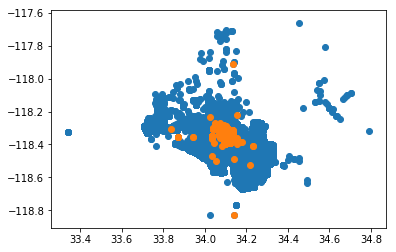

In [19]:
# Plot the crime locations
plt.scatter(data['Longitude'], data['Latitude'])

# Plot Hollywood crimes for comparison
hollywood = data.loc[data['Area ID'] == 6, ['Longitude', 'Latitude']]
plt.scatter(hollywood['Longitude'], hollywood['Latitude'])

plt.show()

del hollywood

### 1.1.5 Status Code (removed from final dataset)

In [20]:
print(data['Status Code'].unique())
print(data.groupby('Status Code')['DR Number'].nunique())
print('Null:', data['Status Code'].isnull().sum())

['AO' 'IC' 'AA' 'JA' 'JO' nan 'CC' 'TH' '13' '19']
Status Code
13          1
19          1
AA     162424
AO     178175
CC         24
IC    1227180
JA      12619
JO       3889
TH          1
Name: DR Number, dtype: int64
Null: 2


In [21]:
print(data['Status Description'].unique())
print(data.groupby('Status Description')['DR Number'].nunique())
print('Null:', data['Status Description'].isnull().sum())

['Adult Other' 'Invest Cont' 'Adult Arrest' 'Juv Arrest' 'Juv Other' 'UNK']
Status Description
Adult Arrest     162424
Adult Other      178175
Invest Cont     1227180
Juv Arrest        12619
Juv Other          3889
UNK                  29
Name: DR Number, dtype: int64
Null: 0


### 1.1.6 Date Occurred

In [22]:
# Print number of nulls
print('Null:', data['Date Occurred'].isnull().sum())

Null: 0


In [23]:
# convert to datetime
data.loc[:, 'Date Occurred'] = pd.to_datetime(data.loc[:, 'Date Occurred'], format='%m/%d/%Y')

# convert to unix timestamp
data.loc[:, 'Timestamp'] = data.loc[:, 'Date Occurred'].astype(np.int64) // 10**9

In [24]:
# Seperate the date column into month, day, year
data.loc[:, 'Month'] = data.loc[:, 'Date Occurred'].dt.month
data.loc[:, 'Day'] = data.loc[:, 'Date Occurred'].dt.day
data.loc[:, 'Year'] = data.loc[:, 'Date Occurred'].dt.year

### 1.1.7 Make List Function

In [25]:
def make_list(data, code, desc):
    '''
    Creates a dictionary that maps the codes to a description.
    Note: Does not account for errors in the data.
    The function will add the first occurence of each code into the dict with its associated description.
    '''
    codes = data[code].unique()
    d = []
    for i in codes:
        temp = data[data[code] == i]
        if not temp.empty:
            d.append([i, temp[desc].iloc[0]])
    return d

### 1.1.7 Weapon Used Code

In [26]:
# Make new column for whether or not a weapon was used. 0 if no weapon, 1 if weapon
data.loc[data['Weapon Used Code'].isna(), 'Weapon Used Bool'] = 0
data.loc[data['Weapon Used Code'].notna(), 'Weapon Used Bool'] = 1

In [27]:
weap_list = make_list(data, 'Weapon Used Code', 'Weapon Description')

In [28]:
sorted(weap_list)

[[101.0, 'REVOLVER'],
 [102.0, 'HAND GUN'],
 [103.0, 'RIFLE'],
 [104.0, 'SHOTGUN'],
 [105.0, 'SAWED OFF RIFLE/SHOTGUN'],
 [106.0, 'UNKNOWN FIREARM'],
 [107.0, 'OTHER FIREARM'],
 [108.0, 'AUTOMATIC WEAPON/SUB-MACHINE GUN'],
 [109.0, 'SEMI-AUTOMATIC PISTOL'],
 [110.0, 'SEMI-AUTOMATIC RIFLE'],
 [111.0, 'STARTER PISTOL/REVOLVER'],
 [112.0, 'TOY GUN'],
 [113.0, 'SIMULATED GUN'],
 [114.0, 'AIR PISTOL/REVOLVER/RIFLE/BB GUN'],
 [115.0, 'ASSAULT WEAPON/UZI/AK47/ETC'],
 [116.0, 'ANTIQUE FIREARM'],
 [117.0, 'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE'],
 [118.0, 'UZI SEMIAUTOMATIC ASSAULT RIFLE'],
 [119.0, 'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON'],
 [120.0, 'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON'],
 [121.0, 'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE'],
 [122.0, 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE'],
 [123.0, 'M1-1 SEMIAUTOMATIC ASSAULT RIFLE'],
 [124.0, 'M-14 SEMIAUTOMATIC ASSAULT RIFLE'],
 [125.0, 'RELIC FIREARM'],
 [200.0, 'KNIFE WITH BLADE 6INCHES OR LESS'],
 [201.0, 'KNIFE WITH BLADE OVER

In [29]:
# Saves the weapon codes to a csv, only needs to be run once.
#pd.DataFrame(weap_list, columns=['Weapon Used Code', 'Weapon Description']).to_csv('data/weapon_codes.csv')

### 1.1.8 Crime Code

In [30]:
crime_list = make_list(data, 'Crime Code', 'Crime Code Description')

In [31]:
sorted(crime_list)

[[110, 'CRIMINAL HOMICIDE'],
 [113, 'MANSLAUGHTER, NEGLIGENT'],
 [121, 'RAPE, FORCIBLE'],
 [122, 'RAPE, ATTEMPTED'],
 [210, 'ROBBERY'],
 [220, 'ATTEMPTED ROBBERY'],
 [230, 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'],
 [231, 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER'],
 [235, 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT'],
 [236, 'INTIMATE PARTNER - AGGRAVATED ASSAULT'],
 [237, 'CHILD NEGLECT (SEE 300 W.I.C.)'],
 [250, 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT'],
 [251, 'SHOTS FIRED AT INHABITED DWELLING'],
 [310, 'BURGLARY'],
 [320, 'BURGLARY, ATTEMPTED'],
 [330, 'BURGLARY FROM VEHICLE'],
 [331, 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)'],
 [341, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036'],
 [343, 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)'],
 [345, 'DISHONEST EMPLOYEE - GRAND THEFT'],
 [347, 'GRAND THEFT / INSURANCE FRAUD'],
 [349, 'GRAND THEFT / AUTO REPAIR'],
 [350, 'THEFT, PERSON'],
 [351, 'PURSE SNATCHING'],
 [352, 'PICKPOCKET'],
 [353,

In [32]:
len(crime_list)

138

In [33]:
# Saves the crime codes to a csv, only needs to be run once.
#pd.DataFrame(crime_list, columns=['Crime Code', 'Crime Description']).to_csv('data/crime_codes.csv')

### 1.1.9 Premise Code

In [34]:
premise_list = make_list(data, 'Premise Code', 'Premise Description')

In [35]:
sorted(premise_list)

[[101.0, 'STREET'],
 [102.0, 'SIDEWALK'],
 [103.0, 'ALLEY'],
 [104.0, 'DRIVEWAY'],
 [105.0, 'PEDESTRIAN OVERCROSSING'],
 [106.0, 'TUNNEL'],
 [107.0, 'VACANT LOT'],
 [108.0, 'PARKING LOT'],
 [109.0, 'PARK/PLAYGROUND'],
 [110.0, 'FREEWAY'],
 [111.0, 'CHARTER BUS AND PRIVATELY OWNED BUS'],
 [112.0, 'BUS, SCHOOL, CHURCH'],
 [113.0, 'TRUCK, COMMERICAL'],
 [114.0, 'TAXI'],
 [115.0, 'AIRCRAFT'],
 [116.0, 'OTHER/OUTSIDE'],
 [117.0, 'BEACH'],
 [118.0, 'CONSTRUCTION SITE'],
 [119.0, 'PORCH, RESIDENTIAL'],
 [120.0, 'STORAGE SHED'],
 [121.0, 'YARD (RESIDENTIAL/BUSINESS)'],
 [122.0, 'VEHICLE, PASSENGER/TRUCK'],
 [123.0, 'PARKING UNDERGROUND/BUILDING'],
 [124.0, 'BUS STOP'],
 [125.0, 'PAY PHONE'],
 [126.0, 'TRAIN'],
 [127.0, 'TRASH CAN/TRASH DUMPSTER'],
 [128.0, 'BUS STOP OR LAYOVER'],
 [129.0, 'TERMINAL'],
 [130.0, 'REDLINE ENTRANCE/EXIT'],
 [131.0, 'REDLINE SUBWAY PLATFORM'],
 [132.0, 'REDLINE SUBWAY MEZZANINE'],
 [133.0, 'REDLINE SUBWAY RAIL CAR (INSIDE TRAIN)'],
 [134.0, 'REDLINE SUBWAY TUNNEL']

In [36]:
# Saves the premise codes to a csv, only needs to be run once.
#pd.DataFrame(premise_list, columns=['Premise Code', 'Premise Description']).to_csv('data/premise_codes.csv')

### 1.1.10 Area ID

In [37]:
area_list = make_list(data, 'Area ID', 'Area Name')

In [38]:
sorted(area_list)

[[1, 'Central'],
 [2, 'Rampart'],
 [3, 'Southwest'],
 [4, 'Hollenbeck'],
 [5, 'Harbor'],
 [6, 'Hollywood'],
 [7, 'Wilshire'],
 [8, 'West LA'],
 [9, 'Van Nuys'],
 [10, 'West Valley'],
 [11, 'Northeast'],
 [12, '77th Street'],
 [13, 'Newton'],
 [14, 'Pacific'],
 [15, 'N Hollywood'],
 [16, 'Foothill'],
 [17, 'Devonshire'],
 [18, 'Southeast'],
 [19, 'Mission'],
 [20, 'Olympic'],
 [21, 'Topanga']]

In [39]:
# Saves the area codes to a csv, only needs to be run once.
#pd.DataFrame(area_list, columns=['Area ID', 'Area Name']).to_csv('data/area_codes.csv')

## 1.3 Compute Correlation Matrix
Select features with high correlation.

In [40]:
# Alternative to below solution
'''corrDf = data.corr()

corrGrp = {'low':[], 'medium':[], 'high':[]}
rowCount = 0
for i, j in corrDf.iterrows():
    colCount = 0
    for m, n in j.iteritems():
        if rowCount >= colCount and n < 1:
            #print(n)
            if -0.33 < n < 0.33:
                corrGrp['low'].append([i, m, n])
            elif (0.33 <= n < 0.66) or (-0.66 < n <= -0.33):
                corrGrp['medium'].append([i, m, n])
            elif (0.66 <= n) or (n <= -0.66):
                corrGrp['high'].append([i, m, n])
        colCount += 1
    rowCount += 1

display(corrGrp['medium'])
display(corrGrp['high'])'''


corr = data.corr().unstack()
corr.sort_values(inplace=True)
corr = corr[corr < 1]
low = corr[(corr < 0.3) & (corr > -0.3)]
med = corr[((corr >= 0.3) & (corr < 0.6)) | ((corr <= -0.3) & (corr > -0.6))]
high = corr[(corr >= 0.6) | (corr <= -0.6)]

print('Medium Correlation (0.3 <= |x| < 0.6)')
display(med.iloc[::2].to_frame(name='Correlation'))
print('\nHigh Correlation (0.6 <= |x| < 1)')
display(high.iloc[::2].to_frame(name='Correlation'))

Medium Correlation (0.3 <= |x| < 0.6)


,,Correlation
Latitude,Longitude,-0.589918
Reporting District,Latitude,-0.453676
Latitude,Area ID,-0.452709
Reporting District,Longitude,0.374877
Area ID,Longitude,0.377786
Crime Code,Weapon Used Code,0.432260
Crime Code 1,Weapon Used Code,0.432594
Crime Code 4,Crime Code 3,0.506226



High Correlation (0.6 <= |x| < 1)


Correlation
DR Number    Timestamp              0.983195
             Year                   0.990360
Timestamp    Year                   0.992086
Area ID      Reporting District     0.998998
Crime Code 1 Crime Code             0.999638

In [41]:
data.corr()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Longitude,Latitude,Timestamp,Month,Day,Year,Weapon Used Bool
DR Number,1.000000,-0.007390,0.016191,0.016248,-0.009166,0.007397,-0.015414,0.000441,-0.009321,-0.099782,-0.010357,0.036429,0.005187,-0.003829,0.983195,-0.066488,-0.003282,0.990360,-0.005769
Time Occurred,-0.007390,1.000000,0.011809,0.012023,0.017712,-0.049945,-0.095394,-0.002821,0.017759,0.007710,0.005377,-0.088805,0.006850,-0.006225,0.001956,0.004076,0.023921,0.001187,-0.003816
Area ID,0.016191,0.011809,1.000000,0.998998,-0.004587,0.009835,0.014475,-0.000490,-0.004650,-0.046569,-0.026894,0.012957,0.377786,-0.452709,-0.012045,-0.002669,-0.004693,-0.011645,-0.029378
Reporting District,0.016248,0.012023,0.998998,1.000000,-0.004624,0.010262,0.014411,-0.000368,-0.004686,-0.045945,-0.024548,0.012456,0.374877,-0.453676,-0.011939,-0.002571,-0.004631,-0.011553,-0.029451
Crime Code,-0.009166,0.017712,-0.004587,-0.004624,1.000000,-0.034478,0.098754,0.432260,0.999638,0.059313,0.092420,0.030399,0.006679,0.010560,-0.008794,-0.003484,-0.006296,-0.008273,0.058222
Victim Age,0.007397,-0.049945,0.009835,0.010262,-0.034478,1.000000,0.167376,0.074359,-0.034394,-0.002280,-0.071872,-0.106784,0.040608,-0.092162,0.003249,0.000373,-0.012514,0.003336,-0.055135
Premise Code,-0.015414,-0.095394,0.014475,0.014411,0.098754,0.167376,1.000000,0.216194,0.098761,-0.036025,-0.069356,0.170824,0.032753,-0.073703,-0.028301,-0.007148,-0.026643,-0.027087,0.020177
Weapon Used Code,0.000441,-0.002821,-0.000490,-0.000368,0.432260,0.074359,0.216194,1.000000,0.432594,-0.095010,0.022898,-0.048323,0.046790,-0.074104,-0.003236,-0.004215,-0.011911,-0.002589,NaN
Crime Code 1,-0.009321,0.017759,-0.004650,-0.004686,0.999638,-0.034394,0.098761,0.432594,1.000000,0.069727,0.124671,0.021249,0.006666,0.010614,-0.008922,-0.003437,-0.006282,-0.008407,0.057706
Crime Code 2,-0.099782,0.007710,-0.046569,-0.045945,0.059313,-0.002280,-0.036025,-0.095010,0.069727,1.000000,0.255056,0.267714,0.014905,0.030465,-0.082891,0.000964,0.018629,-0.083141,-0.000993


In [42]:
data.describe()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Longitude,Latitude,Timestamp,Month,Day,Year,Weapon Used Bool
count,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.455657e+06,1.584240e+06,524757.000000,1.584309e+06,99997.000000,2183.000000,69.000000,1.578825e+06,1.578825e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06
mean,1.358072e+08,1.363975e+03,1.115232e+01,1.161595e+03,5.069982e+02,3.593419e+01,3.124071e+02,370.568852,5.068795e+02,954.461614,970.715529,967.173913,3.407869e+01,-1.183598e+02,1.385571e+09,6.343421e+00,1.550367e+01,2.013423e+03,3.312199e-01
std,2.259098e+07,6.467544e+02,5.986703e+00,5.986644e+02,2.105490e+02,1.681156e+01,2.102334e+02,114.024156,2.104662e+02,123.611988,88.350046,97.571536,1.172572e-01,1.062719e-01,7.117419e+07,3.391193e+00,8.932718e+00,2.257959e+00,4.706521e-01
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,1.000000e+01,1.010000e+02,101.000000,1.100000e+02,121.000000,93.000000,421.000000,3.334270e+01,-1.188279e+02,1.262304e+09,1.000000e+00,1.000000e+00,2.010000e+03,0.000000e+00
25%,1.121176e+08,9.300000e+02,6.000000e+00,6.450000e+02,3.300000e+02,2.300000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.400970e+01,-1.184377e+02,1.323302e+09,3.000000e+00,8.000000e+00,2.011000e+03,0.000000e+00
50%,1.401095e+08,1.430000e+03,1.200000e+01,1.204000e+03,4.400000e+02,3.400000e+01,2.100000e+02,400.000000,4.400000e+02,998.000000,998.000000,998.000000,3.406320e+01,-1.183308e+02,1.386893e+09,6.000000e+00,1.500000e+01,2.013000e+03,0.000000e+00
75%,1.520186e+08,1.900000e+03,1.600000e+01,1.676000e+03,6.260000e+02,4.800000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417810e+01,-1.182782e+02,1.448323e+09,9.000000e+00,2.300000e+01,2.015000e+03,1.000000e+00
max,9.102204e+08,2.359000e+03,2.100000e+01,2.198000e+03,9.560000e+02,9.900000e+01,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,-1.176596e+02,1.504915e+09,1.200000e+01,3.100000e+01,2.017000e+03,1.000000e+00


In [43]:
# fill in null values with the mean of each column
#data.fillna(data.mean(), inplace=True)

In [44]:
# Sort and reset index
#data.sort_values(by=['Timestamp', 'Time Occurred'], inplace=True)

#data.reset_index(inplace=True, drop=True)

In [45]:
# Prepare data by removing descriptive columns and other unimportant columns.
# Removed MO Codes because it contains a list of codes which makes it hard to analyze.
# I don't see address and cross street being particularily useful.
# Not sure what Crime Codes 1 - 4 are so we can remove them for now.
# We will use the Date Occured instead of Date reported.
# Removed status code, not sure what the codes mean and if it is usefull
# Removed location and Date Occurred
# Removed DR Number. Seems to just be the report number which is unimportant.
'''tempDf = data[['Date Occurred', 'Timestamp', 'Time Occurred',
       'Area ID', 'Reporting District', 'Crime Code', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Weapon Used Bool',
       'Weapon Used Code', 'Longitude', 'Latitude']]

# Save to file
tempDf.to_csv('data/Crime_Data_2010_2017_clean2.csv', index=False)

del tempDf'''

"tempDf = data[['Date Occurred', 'Timestamp', 'Time Occurred',\n       'Area ID', 'Reporting District', 'Crime Code', 'Victim Age', 'Victim Sex',\n       'Victim Descent', 'Premise Code', 'Weapon Used Bool',\n       'Weapon Used Code', 'Longitude', 'Latitude']]\n\n# Save to file\ntempDf.to_csv('data/Crime_Data_2010_2017_clean2.csv', index=False)\n\ndel tempDf"